In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

In [2]:
# compute the accuracy of the model
def accuracy(y, tx, w):
    N = len(y)
    predictions =  np.sign(tx@w)
    nb_errors = np.sum(np.absolute(y - predictions)/2)
    
    return (N-nb_errors)/N

## Load the data (both train and test data) into feature matrix, class labels, and event ids:


In [3]:
from proj1_helpers import *

In [4]:
DATA_TRAIN_PATH = '../data/train.csv'
y, train_input_data, ids = load_csv_data(DATA_TRAIN_PATH)

In [6]:
DATA_TEST_PATH = '../data/test.csv' 
y_test, test_input_data, ids_test = load_csv_data(DATA_TEST_PATH)

In [7]:
train_input_data.shape, y.shape

((250000, 30), (250000,))

In [8]:
test_input_data.shape, y_test.shape

((568238, 30), (568238,))

## Preprocess the data

In [9]:
from preprocessing import *

In [10]:
tX = preprocess_data(train_input_data)
y = change_11_to_01_categories(y)

In [11]:
tX_test = preprocess_data(test_input_data)
y_test = change_11_to_01_categories(y_test)

## Do your thing crazy machine learning thing here :) 

In [12]:
from implementations import *

### Linear Regression Using Gradient Descent

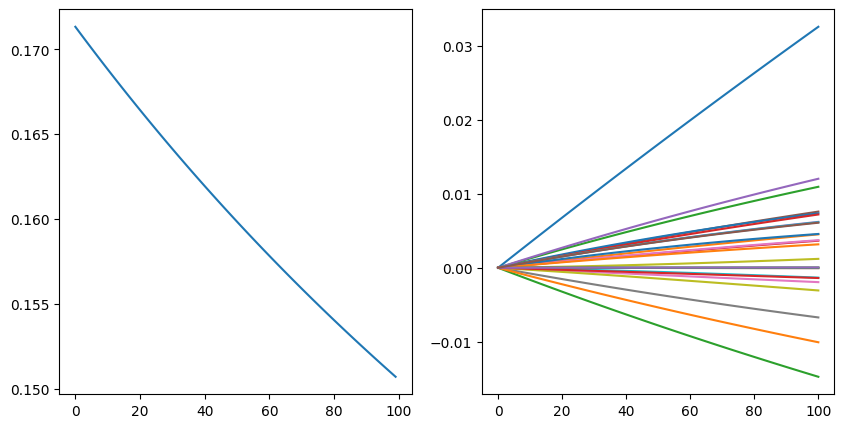

In [13]:
max_iters = 100
gamma = 1e-3

initial_w = np.zeros((tX.shape[1]))

weights, loss, ws, losses = least_squares_GD_complete(y, tX, initial_w, max_iters, gamma)
# display
fig, [ax0, ax1] = plt.subplots(1, 2, figsize=(10,5))
ax0 = ax0.plot(losses)
ax1 = ax1.plot(ws)

In [14]:
loss

0.15054051251774525

In [15]:
# train accuracy
accuracy(y, tX, weights )

0.635258

In [16]:
# test accuracy
accuracy(y_test, tX_test, weights)

0.6679120368577955

### Linear Regression using SGD

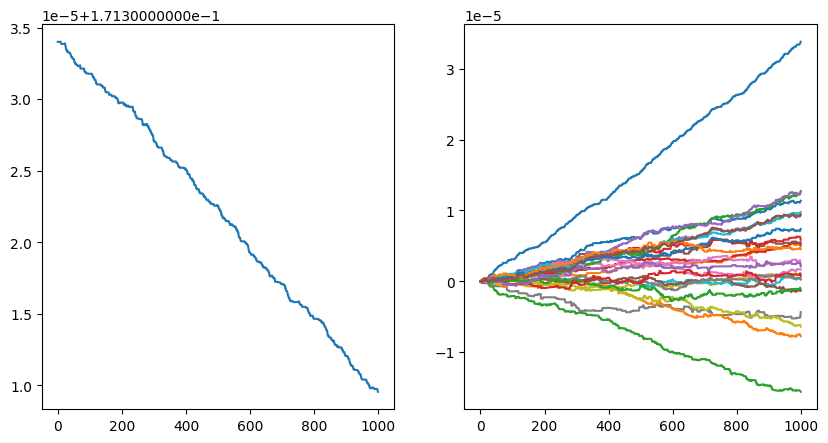

In [17]:
np.random.seed(4)

max_iters = 1000
gamma = 1e-7

initial_w = np.zeros((tX.shape[1]))

weights, loss, ws, losses = least_squares_SGD_complete(y, tX, initial_w, max_iters, gamma)

# display
fig, axes = plt.subplots(1, 2, figsize=(10,5))
axes[0] = axes[0].plot(losses)
axes[1] = axes[1].plot(ws)

In [18]:
loss

0.1713095229108396

In [19]:
# train accuracy
accuracy(y, tX, weights )

0.623706

In [20]:
# test accuracy
accuracy(y_test, tX_test, weights)

0.648789767667773

### Least Squares regression

In [21]:
weights, loss = least_squares(y, tX)
loss

0.08519776884971829

In [22]:
# train accuracy
accuracy(y, tX, weights )

0.669286

In [23]:
# test accuracy
accuracy(y_test, tX_test, weights)

0.9584276306758788

### Ridge Regression

In [24]:
lambda_ = 1e-3
weights, loss = ridge_regression(y, tX, lambda_)

In [25]:
# train accuracy
accuracy(y, tX, weights )

0.66933

In [26]:
# test accuracy
accuracy(y_test, tX_test, weights)

0.9594782467909573

In [27]:
OUTPUT_PATH = '../data/submission.csv'
y_pred = predict_labels(weights, tX_test)
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)

### Logistic regression using gradient descent

In [28]:
max_iters = 100
gamma = 1e-8

initial_w = np.zeros((tX.shape[1]))

weights, loss = logistic_regression(y, tX, initial_w, max_iters, gamma)
loss

164740.1676577357

In [29]:
# train accuracy
accuracy(y, tX, weights )

0.534718

In [30]:
# test accuracy
accuracy(y_test, tX_test, weights)

0.36787754426842273

### Regularized logistic regression using gradient descent

In [31]:
max_iters = 100
gamma = 1e-8
lambda_ = 1e-3

initial_w = np.zeros((tX.shape[1]))

weights, loss = reg_logistic_regression(y, tX, lambda_, initial_w, max_iters, gamma)

In [32]:
# train accuracy
accuracy(y, tX, weights )

0.534718

In [33]:
# test accuracy
accuracy(y_test, tX_test, weights)

0.36787754426842273

### Cross-validation for ridge regression: find best lambda and degree

In [34]:
from cross_validation import *

4-fold cross validation

BEWARE THIS CODE RUNS FOR NEARLY 50 MINUTES :D

In [ ]:
import time
start_time = time.time()

degrees = np.arange(1,12)
lambdas = np.logspace(-4, -1, 30)
k_fold = 4
best_lambda, best_degree = select_best_degree_and_lambda(y, tX, degrees, lambdas, k_fold)

end_time = time.time()
print(f"The execution time is: {end_time-start_time}")

In [ ]:
best_lambda

In [ ]:
best_degree

Now that we found the best degree and lambda, we can run ridge regression with the extended feature matrix created using best_degree and the parameter best_lambda in order to find the optimized w.

In [ ]:
extended_feature_matrix_train = build_poly(tX, best_degree)
extended_feature_matrix_test = build_poly(tX_test, best_degree)

w, _ = ridge_regression(y, extended_feature_matrix_train, best_lambda)

## Generate predictions and save ouput in csv format for submission:

In [35]:
OUTPUT_PATH = '../data/submission.csv'
y_pred = predict_labels(w, extended_feature_matrix_test)
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)

NameError: name 'w' is not defined